In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [67]:
new_data = pd.read_excel('Tab3_zpl_2024.xlsx', sheet_name='с 2017 г.', header=4)
old_data = pd.read_excel('Tab3_zpl_2024.xlsx', sheet_name='2000-2016 гг.', header=2)


new_data = new_data.set_axis(['Отрасль'] + [str(x) for x in range(2017, 2025)], axis='columns')
old_data = old_data.set_axis(['Отрасль'] + [str(x) for x in range(2000, 2017)], axis='columns')


new_data = new_data.dropna(how='any')
old_data = old_data.dropna(how='any')


new_data = pd.concat([
    new_data,
    pd.DataFrame([['Средняя'] + new_data.iloc[:, 1:].mean().tolist()], 
                 columns=new_data.columns)
], ignore_index=True)

old_data = pd.concat([
    old_data,
    pd.DataFrame([['Средняя'] + old_data.iloc[:, 1:].mean().tolist()], 
                 columns=old_data.columns)
], ignore_index=True)


,Отрасль,2017,2018,2019,2020,2021,2022,2023,2024
0,лесоводство и лесозаготовки,27616.600000,32701.000000,35426.200000,37855.000000,42151.800000,48327.200000,53542.800000,62613.400000
1,рыболовство и рыбоводство,68032.000000,75766.000000,88603.800000,94983.000000,101547.400000,121726.200000,143135.100000,151311.600000
2,добыча полезных ископаемых,74474.100000,83178.000000,89343.700000,95359.000000,103473.500000,118375.700000,131588.400000,155556.600000
3,добыча угля,53065.000000,59439.000000,63352.800000,62600.000000,73576.600000,90716.500000,106604.600000,121960.100000
4,добыча нефти и природного газа,104078.300000,127771.000000,135363.700000,142175.000000,149585.100000,165623.800000,180947.000000,218539.400000
5,добыча металлических руд,61121.900000,70721.000000,78519.900000,88154.000000,96365.200000,108316.600000,121607.600000,145645.400000
6,обрабатывающие производства,38501.500000,40722.000000,43855.000000,46510.000000,52409.600000,60438.700000,71855.100000,87008.100000
7,производство пищевых продуктов,29920.100000,32272.000000,35175.000000,37589.000000,42604.500000,48466.900000,56864.700000,69637.300000
8,производство напитков,37933.700000,40305.000000,43204.100000,45435.000000,49861.500000,57248.300000,67023.600000,79458.500000
9,производство табачных изделий,94767.900000,100426.000000,104081.700000,112017.000000,108429.900000,126445.900000,142865.700000,161486.900000


In [71]:
col_name_mapping = {
    'Рыболовство, рыбоводство': 'Рыболовство и рыбоводство',
    'Производство кожи, изделий из кожи и производство обуви': 'Производство кожи и изделий из кожи',
    'Производство резиновых и пластмассовых изделий': 'Производство резиновых и пластмассовых изделий',
    'Торговля оптовая и розничная; ремонт автотранспортных средств и мотоциклов': 'Оптовая и розничная торговля; ремонт автотранспортных средств, мотоциклов, бытовых изделий и предметов личного пользования',
    'Деятельность финансовая и страховая': 'Финансовая деятельность',
    'Государственное управление и обеспечение военной безопасности; социальное обеспечение': 'Государственное управление и обеспечение военной безопасности; социальное страхование',
    'Деятельность в области здравоохранения и социальных услуг': 'Здравоохранение и предоставление социальных услуг',

}

def sanitaze_str(str):
    str = str.strip().capitalize()
    str = re.sub(r'\s{2,}', ' ', str)
    if str in col_name_mapping:
        str = col_name_mapping[str]
    return str

new_data['Отрасль'] = new_data['Отрасль'].apply(sanitaze_str)
old_data['Отрасль'] = old_data['Отрасль'].apply(sanitaze_str)
data = old_data.merge(new_data, on='Отрасль')

data

,Отрасль,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Рыболовство и рыбоводство,2845.600000,3839.300000,5031.300000,5444.500000,7084.900000,10233.500000,12310.800000,14797.00000,19498.900000,...,46676.000000,54927.000000,68032.000000,75766.000000,88603.800000,94983.000000,101547.400000,121726.200000,143135.100000,151311.600000
1,Добыча полезных ископаемых,5940.200000,9099.200000,11080.900000,13912.400000,16841.700000,19726.900000,23145.200000,28107.50000,33206.100000,...,63695.000000,69936.000000,74474.100000,83178.000000,89343.700000,95359.000000,103473.500000,118375.700000,131588.400000,155556.600000
2,Обрабатывающие производства,2365.200000,3446.600000,4439.100000,5603.400000,6848.900000,8420.900000,10198.500000,12878.70000,16049.900000,...,31910.000000,34592.000000,38501.500000,40722.000000,43855.000000,46510.000000,52409.600000,60438.700000,71855.100000,87008.100000
3,Производство кожи и изделий из кожи,1347.800000,1986.100000,2621.100000,3230.000000,3774.700000,4695.300000,5649.100000,7537.00000,9522.300000,...,17796.000000,19847.000000,20193.000000,23576.000000,25680.300000,26913.000000,31771.200000,36445.000000,44351.200000,51240.000000
4,Производство кокса и нефтепродуктов,4916.300000,7012.400000,9625.300000,11879.000000,13729.300000,19397.100000,22319.600000,28565.00000,34912.500000,...,81605.000000,88194.000000,95956.700000,87591.000000,81685.200000,82106.000000,87214.400000,97720.300000,109466.800000,128863.700000
5,Производство резиновых и пластмассовых изделий,2140.400000,3032.200000,3957.100000,4950.700000,5956.800000,6879.200000,8767.700000,11082.60000,13464.000000,...,25006.000000,27565.000000,30621.800000,33581.000000,35623.400000,39662.000000,44817.400000,51471.000000,61706.700000,72628.400000
6,Строительство,2639.800000,3859.300000,4806.900000,6176.700000,7304.700000,9042.800000,10869.200000,14333.40000,18574.000000,...,29960.000000,32332.000000,33677.900000,38518.000000,42629.900000,44738.000000,51944.200000,60849.500000,71707.000000,84291.300000
7,Оптовая и розничная торговля; ремонт автотранс...,1584.500000,2294.900000,3068.900000,3974.200000,4906.200000,6552.100000,8234.900000,11476.30000,14927.400000,...,26947.000000,30030.000000,32092.500000,35444.000000,40137.000000,41867.000000,50388.800000,57806.100000,66225.700000,75228.200000
8,Финансовая деятельность,5232.200000,8885.200000,13245.900000,15561.200000,17383.800000,22463.500000,27885.500000,34879.80000,41871.800000,...,70088.000000,80289.000000,84904.000000,91070.000000,103667.800000,112680.000000,130223.300000,146637.100000,170600.200000,206318.400000
9,Государственное управление и обеспечение военн...,2712.100000,3754.900000,5200.400000,6913.800000,7898.600000,10958.500000,13477.300000,16896.30000,21344.100000,...,41916.000000,43611.000000,43499.700000,47803.000000,50990.500000,54496.000000,58620.300000,63505.200000,73949.300000,84925.600000


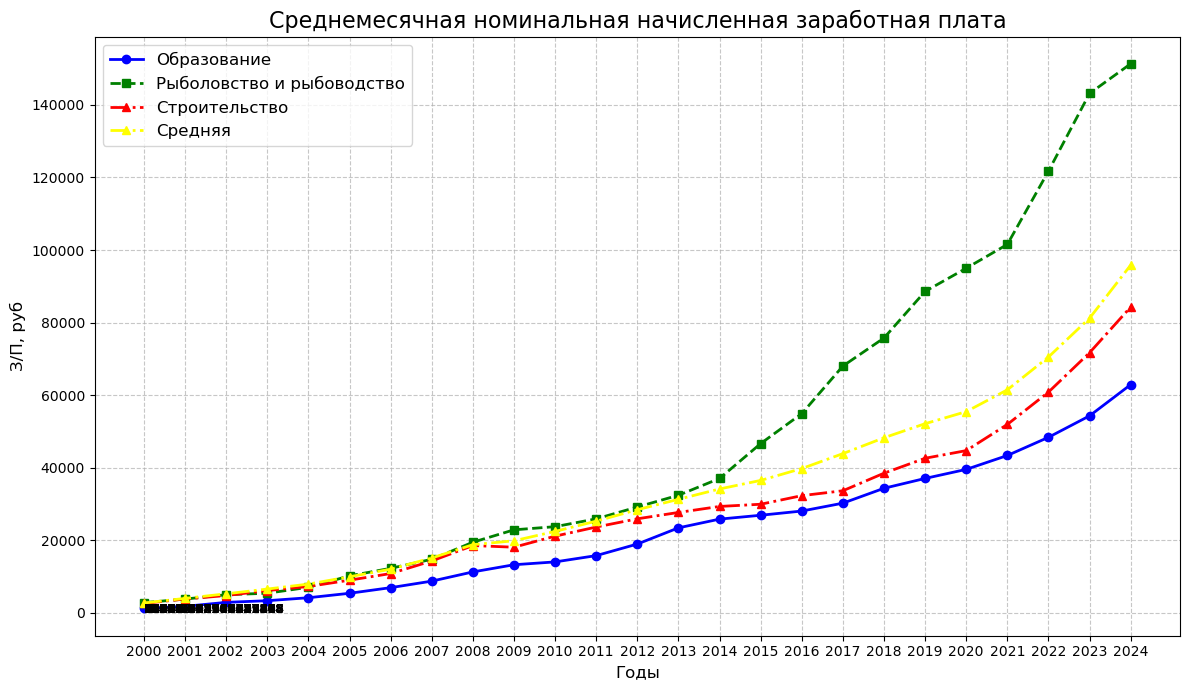

In [74]:

selected_industries = ["Образование", "Рыболовство и рыбоводство", "Строительство", "Средняя"]
industry_data = data.loc[selected_industries]
plt.figure(figsize=(12, 7))
styles = {
    "Образование": {'color': 'blue', 'marker': 'o', 'linestyle': '-', 'linewidth': 2},
    "Рыболовство и рыбоводство": {'color': 'green', 'marker': 's', 'linestyle': '--', 'linewidth': 2},
    "Строительство": {'color': 'red', 'marker': '^', 'linestyle': '-.', 'linewidth': 2},
    "Средняя": {'color': 'yellow', 'marker': '^', 'linestyle': '-.', 'linewidth': 2}

}

for industry in selected_industries:
    plt.plot(
        industry_data.columns, 
        industry_data.loc[industry], 
        label=industry,
        **styles[industry]
    )

plt.title('Среднемесячная номинальная начисленная заработная плата', fontsize=16)
plt.xlabel('Годы', fontsize=12)
plt.ylabel('З/П, руб', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
for industry in selected_industries:
    for i, value in enumerate(industry_data.loc[industry]):
        plt.annotate(
            f'{value}', 
            (i, value),
            xytext=(0, 10),
            fontsize=9
        )

plt.tight_layout()
plt.show()

Можно заметить, что среднемесячная номинальная заработная плата с каждым годом растет, однако с 2015 года люди, занимающиеся рыболовством имеет зп больше средней, в то время как строители и профессионалы в сфере образования зарабатывают меньше! Теперь я знаю куда идти!

In [104]:
infl = pd.read_excel('inflation.xlsx', index_col='Год')
infl = infl['Всего']
infl.name = 'Инфляция'
infl = infl.iloc[1:]
infl = infl.sort_index()

In [108]:

def discount(year_from, year_to, sum):
    result = sum
    for x in range(year_from, year_to, -1):
        result /= 1.0 + infl.loc[x] / 100.0
    return result
data

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Отрасль,,,,,,,,,,,,,,,,,,,,,
Рыболовство и рыбоводство,2845.600000,3839.300000,5031.300000,5444.500000,7084.900000,10233.500000,12310.800000,14797.00000,19498.900000,22913.5,...,46676.000000,54927.000000,68032.000000,75766.000000,88603.800000,94983.000000,101547.400000,121726.200000,143135.100000,151311.600000
Добыча полезных ископаемых,5940.200000,9099.200000,11080.900000,13912.400000,16841.700000,19726.900000,23145.200000,28107.50000,33206.100000,35363.4,...,63695.000000,69936.000000,74474.100000,83178.000000,89343.700000,95359.000000,103473.500000,118375.700000,131588.400000,155556.600000
Обрабатывающие производства,2365.200000,3446.600000,4439.100000,5603.400000,6848.900000,8420.900000,10198.500000,12878.70000,16049.900000,16583.1,...,31910.000000,34592.000000,38501.500000,40722.000000,43855.000000,46510.000000,52409.600000,60438.700000,71855.100000,87008.100000
Производство кожи и изделий из кожи,1347.800000,1986.100000,2621.100000,3230.000000,3774.700000,4695.300000,5649.100000,7537.00000,9522.300000,10073.2,...,17796.000000,19847.000000,20193.000000,23576.000000,25680.300000,26913.000000,31771.200000,36445.000000,44351.200000,51240.000000
Производство кокса и нефтепродуктов,4916.300000,7012.400000,9625.300000,11879.000000,13729.300000,19397.100000,22319.600000,28565.00000,34912.500000,37963.7,...,81605.000000,88194.000000,95956.700000,87591.000000,81685.200000,82106.000000,87214.400000,97720.300000,109466.800000,128863.700000
Производство резиновых и пластмассовых изделий,2140.400000,3032.200000,3957.100000,4950.700000,5956.800000,6879.200000,8767.700000,11082.60000,13464.000000,13850.6,...,25006.000000,27565.000000,30621.800000,33581.000000,35623.400000,39662.000000,44817.400000,51471.000000,61706.700000,72628.400000
Строительство,2639.800000,3859.300000,4806.900000,6176.700000,7304.700000,9042.800000,10869.200000,14333.40000,18574.000000,18122.2,...,29960.000000,32332.000000,33677.900000,38518.000000,42629.900000,44738.000000,51944.200000,60849.500000,71707.000000,84291.300000
"Оптовая и розничная торговля; ремонт автотранспортных средств, мотоциклов, бытовых изделий и предметов личного пользования",1584.500000,2294.900000,3068.900000,3974.200000,4906.200000,6552.100000,8234.900000,11476.30000,14927.400000,15958.6,...,26947.000000,30030.000000,32092.500000,35444.000000,40137.000000,41867.000000,50388.800000,57806.100000,66225.700000,75228.200000
Финансовая деятельность,5232.200000,8885.200000,13245.900000,15561.200000,17383.800000,22463.500000,27885.500000,34879.80000,41871.800000,42372.9,...,70088.000000,80289.000000,84904.000000,91070.000000,103667.800000,112680.000000,130223.300000,146637.100000,170600.200000,206318.400000


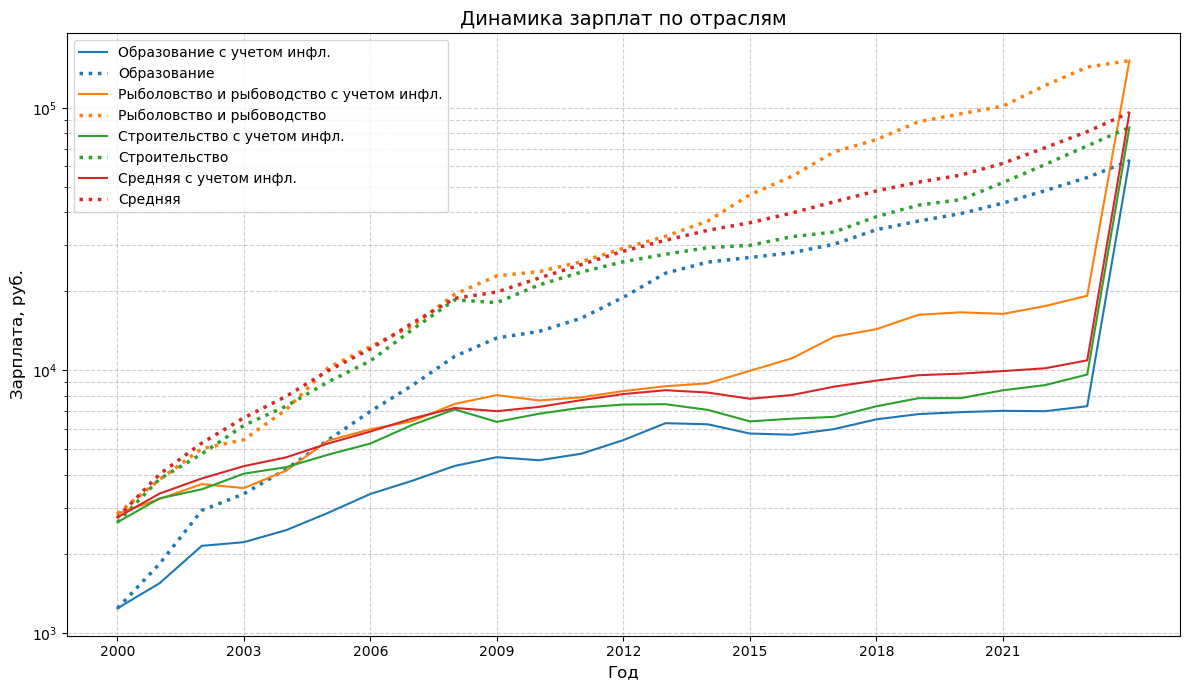

In [112]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 7))
colors = plt.cm.tab10.colors
color_idx = 0
lines = ["Образование", "Рыболовство и рыбоводство", "Строительство", "Средняя"]

for name in lines:
    dt = data.loc[name]         
    dt_real = data_2000.loc[name] 
    years = dt.index.astype(int)
    years_real = dt_real.index.astype(int)
    
    ax.plot(years_real, dt_real.values, 
            label=f'{name} с учетом инфл.', 
            color=colors[color_idx])
    
    ax.plot(years, dt.values, 
            label=name, 
            linestyle=':', 
            linewidth=2.5,
            color=colors[color_idx])
    
    color_idx = (color_idx + 1) % len(colors) 

ax.set_xlabel('Год', fontsize=12)
ax.set_ylabel('Зарплата, руб.', fontsize=12)
ax.set_yscale('log')  
ax.grid(True, which='both', linestyle='--', alpha=0.6)
ax.legend(fontsize=10, loc='best')
ax.set_title('Динамика зарплат по отраслям', fontsize=14)
ax.set_xticks(np.arange(2000, 2024, 3))
ax.tick_params(axis='both', which='major', labelsize=10)

plt.tight_layout()
plt.show()

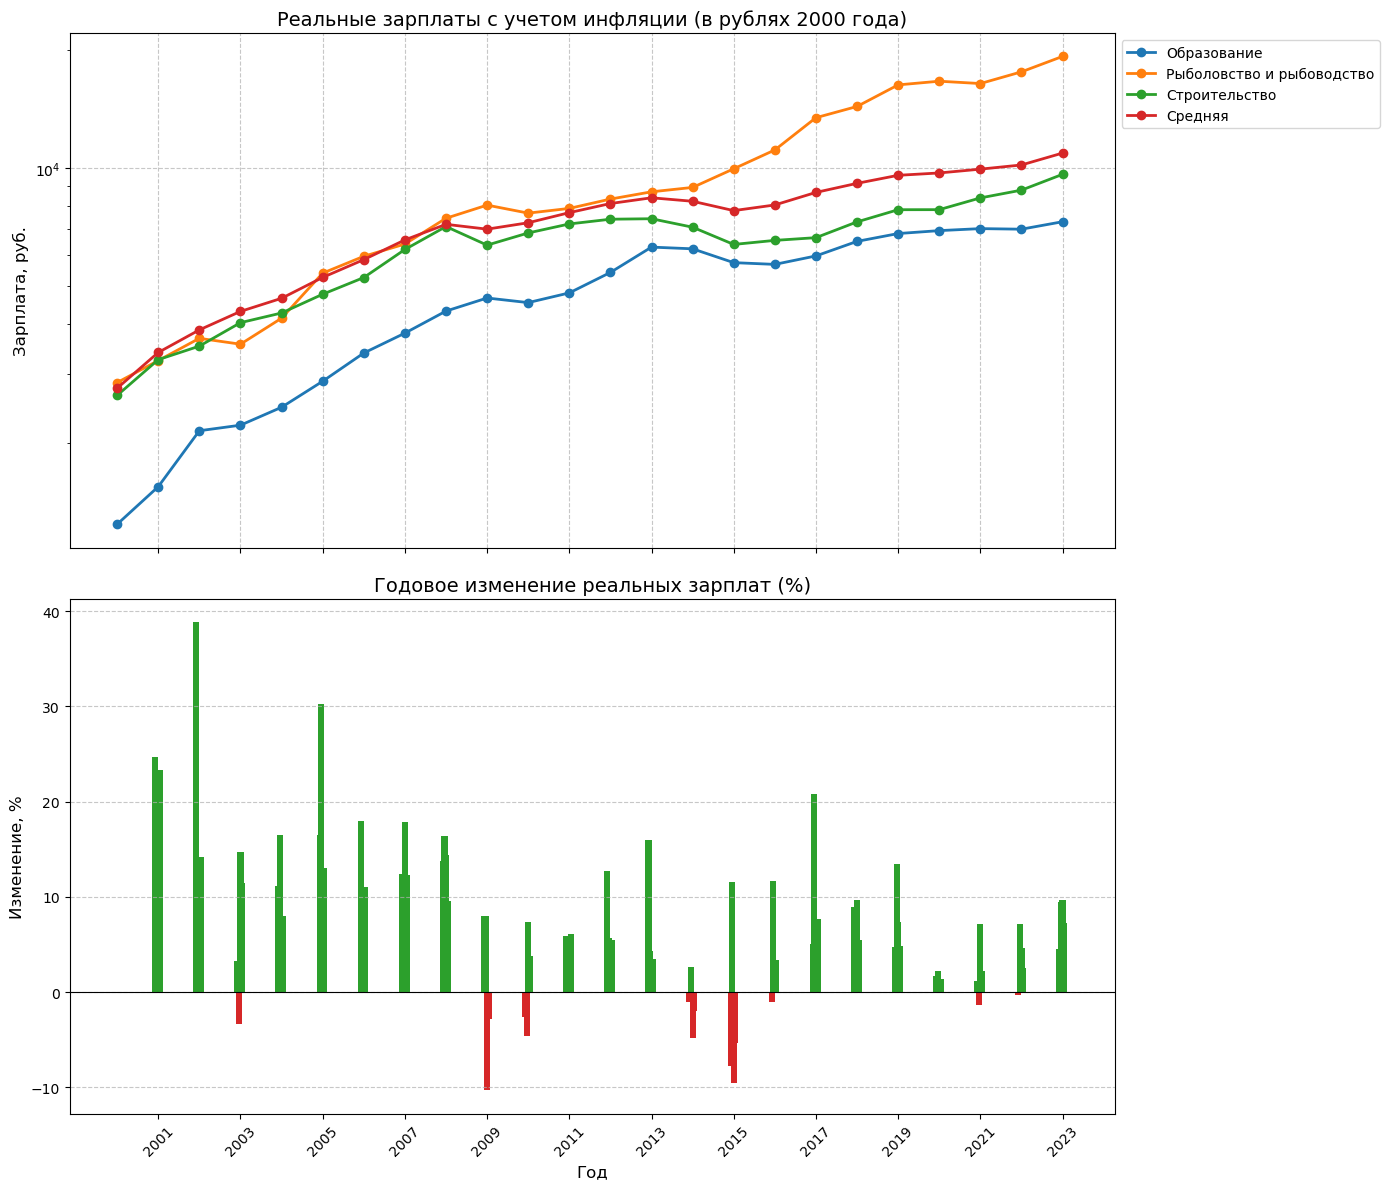

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

changes = pd.DataFrame(index=data_2000.index)
for year in range(2001, 2024):
    prev_year = year - 1
    if str(year) in data_2000.columns and str(prev_year) in data_2000.columns:
        changes[str(year)] = (data_2000[str(year)] / data_2000[str(prev_year)] - 1) * 100
    else:
        changes[str(year)] = np.nan  


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

colors = plt.cm.tab10.colors
years = np.arange(2000, 2024)
color_idx = 0

for name in lines:
    real_salaries = data_2000.loc[name, [str(y) for y in years]].values.astype(float)
    if len(years) != len(real_salaries):
        real_salaries = real_salaries[:len(years)] if len(real_salaries) > len(years) else real_salaries
    
    ax1.plot(years, real_salaries, 
             label=name, 
             color=colors[color_idx],
             marker='o',
             linewidth=2)
    
    color_idx = (color_idx + 1) % len(colors)

ax1.set_title('Реальные зарплаты с учетом инфляции (в рублях 2000 года)', fontsize=14)
ax1.set_ylabel('Зарплата, руб.', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
ax1.set_yscale('log')
ax1.tick_params(axis='y', labelsize=10)


color_idx = 0
years_changes = np.arange(2001, 2024)

for name in lines:
    # Извлекаем данные изменений
    if name in changes.index:
        y_values = changes.loc[name, [str(y) for y in years_changes]].values.astype(float)
        

        if len(y_values) != len(years_changes):
            print(f"Ошибка размера изменений для {name}: годы {len(years_changes)} vs данные {len(y_values)}")
            y_values = y_values[:len(years_changes)] if len(y_values) > len(years_changes) else y_values
        

        colors_bars = ['#2ca02c' if v >= 0 else '#d62728' for v in y_values]
        

        pos_offset = 0.15 * (color_idx - len(lines)/2) / len(lines)
        positions = years_changes + pos_offset
        
        bars = ax2.bar(
            positions, 
            y_values, 
            width=0.15, 
            color=colors_bars,
            label=name
        )
        

    
    color_idx = (color_idx + 1) % len(colors)

ax2.set_title('Годовое изменение реальных зарплат (%)', fontsize=14)
ax2.set_xlabel('Год', fontsize=12)
ax2.set_ylabel('Изменение, %', fontsize=12)
ax2.axhline(y=0, color='black', linewidth=0.8)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)
ax2.set_xticks(np.arange(2001, 2024, 2))
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
plt.savefig("диаграма.pdf")

Выводы по первому графику:
Общий тренд: Все отрасли демонстрируют рост реальных зарплат за период 2000-2023 гг.
Неравномерность роста-С

Строительство и рыболовство показывают наиболее быстрый р-ст

Образование отстает от других отсйдером

Кризисные периоды: Видны точки замедления роста/падения (2009, 2014-2015 гг.)

Выводы по втрому графику:
Волатильность отраслей:-
Рыболовство/рыбоводство: самые резкие колебания (пики до +25%, падения до -15%-

Строительство: высокая чувствительность к кризисам (глубокие падения в 2009, 20-5)

Образование: относительно стабильная динамика изменений

Кризисны годы:

2009: сильное падение во всех отраслях (максимум в строительстве  до -15%)

2015: повторное падение, но меее глубокое

2020: несмотря на пандемию, роста падения 
е наблюдается

Периодывосстановления:

2010-2011: компенсационный рост осле кризиса 2009

2016-2018: устойчивый рост после кризиса 2015